In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [5]:
# Set image dimensions
IMG_SIZE = 150
BATCH_SIZE = 32

# Augment training data to prevent overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    zoom_range=0.2, 
    shear_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
# Load data from directories
# When using ImageDataGenerator with flow_from_directory(),
# the function expects that your data is organized into separate folders for each class. i.e test/normal, test/pneumonia
train_generator = train_datagen.flow_from_directory(
    'dataset/train', 
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE, 
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    'dataset/val', 
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE, 
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    'dataset/test', 
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE, 
    class_mode='binary'
)



sample_batch = next(train_generator)
sample_images, sample_labels = sample_batch

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", val_generator.samples)

Number of training samples: 5216
Number of validation samples: 16


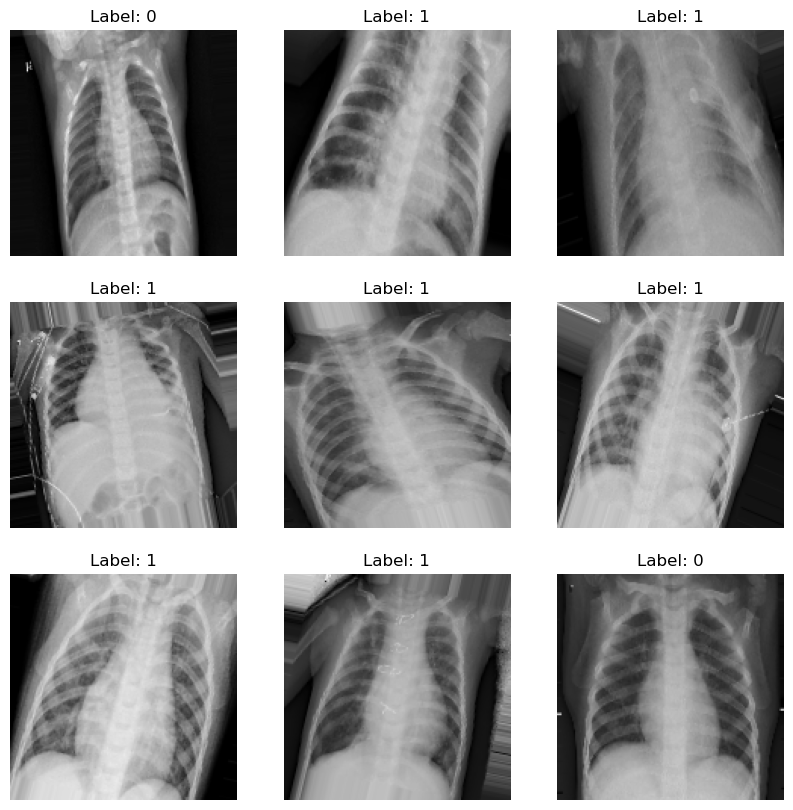

In [8]:
# Plot a few augmented images
# images in the normal folder are labeled 0, and those in the pneumonia folder are labeled 1
plt.figure(figsize=(10, 10))
for i in range(9):  # Displaying 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Label: {int(sample_labels[i])}')
    plt.axis('off')

plt.show()

model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),  # Input layer with shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=10  # Adjust this based on your needs

    
)


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model.save('pneumonia_detector_model.keras')

c:\Users\phili\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 163s 984ms/step - accuracy: 0.7595 - loss: 0.5542 - val_accuracy: 0.8125 - val_loss: 0.6643
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 662ms/step - accuracy: 0.8889 - loss: 0.2605 - val_accuracy: 0.6250 - val_loss: 1.8194
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 707ms/step - accuracy: 0.9087 - loss: 0.2231 - val_accuracy: 0.5625 - val_loss: 1.1191
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 109s 669ms/step - accuracy: 0.9242 - loss: 0.1985 - val_accuracy: 0.6875 - val_loss: 0.6979
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 679ms/step - accuracy: 0.9262 - loss: 0.1858 - val_accuracy: 0.6875 - val_loss: 0.6462
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 109s 666ms/step - accuracy: 0.9328 - loss: 0.1588 - val_accuracy: 0.5625 - val_loss: 0.9372
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 636ms/step - accuracy: 0.9457 - loss: 0.1441 - val_accuracy: 0.5625 - val_loss: 1.0984
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 632ms/step - accuracy: 0.9508 -